In [1]:
import os
ROOT = os.path.join(open('../root').read().strip(), 'common')
print ROOT
img_path = os.path.join(os.path.dirname(ROOT), 'Barcodes/Images')
print img_path
conf_path = os.path.join(os.path.dirname(ROOT), 'Barcodes/Annotations')
print conf_path

/home/nik-kochetov/work/common
/home/nik-kochetov/work/Barcodes/Images
/home/nik-kochetov/work/Barcodes/Annotations


In [2]:
from model import SSDModel
ssd_model = SSDModel()

Using Theano backend.


(37, 37, 24, 1)
(37, 37, 6, 1)
(18, 18, 24, 1)
(18, 18, 6, 1)
(7, 7, 24, 1)
(7, 7, 6, 1)
(5, 5, 24, 1)
(5, 5, 6, 1)
(3, 3, 24, 1)
(3, 3, 6, 1)
(1, 1, 24, 1)
(1, 1, 6, 1)


In [40]:
import converter
reload(converter)
from converter import Converter
ssd_converter = Converter(ROOT)
ssd_converter.process_rects(conf_path, ssd_model, 10, 1)

10 files to process
0 Interleaved_2_of_5_(1)_0088_15.xml 35
1 Interleaved_2_of_5_Check_0099_0.xml 24
2 Code_128A_0174_42.xml 17
3 Interleaved_2_of_5_(1)_0240_15.xml 78
4 Interleaved_2_of_5_Check_0227_1.xml 16
5 Interleaved_2_of_5_(1)_0287_31.xml 16
6 Reclamations_Interleaved_2_of_5_0061_25.xml 0
7 Code_128A_0258_30.xml 90
8 Code_128C_0278_6.xml 37
9 Code_128B_0136_42.xml 12


In [4]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [5]:
print ssd_model.cls_names
print ssd_model.bbox_names

['block4_class', 'block5_class', 'block6_class', 'block7_class', 'block8_class', 'block9_class']
['block4_bbox', 'block5_bbox', 'block6_bbox', 'block7_bbox', 'block8_bbox', 'block9_bbox']


In [6]:
def tensor_dict_to_list(model, tensor_dict):
    lst = []
    for name in ssd_model.bbox_names:
        lst.append(tensor_dict[name])
    for name in ssd_model.cls_names:
        lst.append(tensor_dict[name])
    return lst

In [30]:
import generator
reload(generator)
from generator import Generator
ssd_generator = Generator(img_path, ssd_model)

In [8]:
gen = ssd_generator.generate(ssd_converter.processed_rects, 1, True)

In [46]:
# print next(gen)[1]
for i in range(8):
    tensor = tensor_dict_to_list(ssd_model, next(gen)[1])
tensor

/home/nik-kochetov/work/Barcodes/Images/Code_128A_0174_42.jpg
/home/nik-kochetov/work/Barcodes/Images/Code_128A_0258_30.jpg
/home/nik-kochetov/work/Barcodes/Images/Interleaved_2_of_5_(1)_0287_31.jpg
/home/nik-kochetov/work/Barcodes/Images/Reclamations_Interleaved_2_of_5_0061_25.jpg
/home/nik-kochetov/work/Barcodes/Images/Interleaved_2_of_5_(1)_0240_15.jpg
/home/nik-kochetov/work/Barcodes/Images/Interleaved_2_of_5_(1)_0088_15.jpg
/home/nik-kochetov/work/Barcodes/Images/Code_128B_0136_42.jpg
/home/nik-kochetov/work/Barcodes/Images/Interleaved_2_of_5_Check_0227_1.jpg


[array([[[[[ 0.],
           [ 0.],
           [ 0.],
           ..., 
           [ 0.],
           [ 0.],
           [ 0.]],
 
          [[ 0.],
           [ 0.],
           [ 0.],
           ..., 
           [ 0.],
           [ 0.],
           [ 0.]],
 
          [[ 0.],
           [ 0.],
           [ 0.],
           ..., 
           [ 0.],
           [ 0.],
           [ 0.]],
 
          ..., 
          [[ 0.],
           [ 0.],
           [ 0.],
           ..., 
           [ 0.],
           [ 0.],
           [ 0.]],
 
          [[ 0.],
           [ 0.],
           [ 0.],
           ..., 
           [ 0.],
           [ 0.],
           [ 0.]],
 
          [[ 0.],
           [ 0.],
           [ 0.],
           ..., 
           [ 0.],
           [ 0.],
           [ 0.]]],
 
 
         [[[ 0.],
           [ 0.],
           [ 0.],
           ..., 
           [ 0.],
           [ 0.],
           [ 0.]],
 
          [[ 0.],
           [ 0.],
           [ 0.],
           ..., 
           [ 0

In [47]:
for val in tensor:
    print val.shape

(1, 37, 37, 48, 1)
(1, 18, 18, 48, 1)
(1, 7, 7, 48, 1)
(1, 5, 5, 48, 1)
(1, 3, 3, 48, 1)
(1, 1, 1, 48, 1)
(1, 37, 37, 6, 1)
(1, 18, 18, 6, 1)
(1, 7, 7, 6, 1)
(1, 5, 5, 6, 1)
(1, 3, 3, 6, 1)
(1, 1, 1, 6, 1)


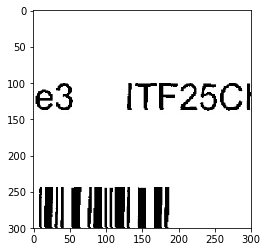

In [49]:
img = np.asarray(Image.open(os.path.join(img_path, 'Interleaved_2_of_5_Check_0227_1.jpg')))
imshow(img)

In [50]:
confs, rects = ssd_converter.restore_rects_batch(tensor, ssd_model, top=10)[0]
print confs
for rect in rects:
    rect.dump()

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
l=0.0,t=0.81,r=0.636666666667,b=1.0
l=0.0,t=0.81,r=0.636666666667,b=1.0
l=-5.55111512313e-17,t=0.81,r=0.636666666667,b=1.0
l=0.0,t=0.81,r=0.636666666667,b=1.0
l=0.0,t=0.81,r=0.636666666667,b=1.0
l=5.55111512313e-17,t=0.81,r=0.636666666667,b=1.0
l=5.55111512313e-17,t=0.81,r=0.636666666667,b=1.0
l=5.55111512313e-17,t=0.81,r=0.636666666667,b=1.0
l=5.55111512313e-17,t=0.81,r=0.636666666667,b=1.0
l=5.55111512313e-17,t=0.81,r=0.636666666667,b=1.0


In [51]:
from rect import Rect
from converter import RectsInfo
info = RectsInfo('Code_128A_0258_30.xml')
info.load_rects(conf_path)
correct = info.rects
for rect in correct:
    rect.dump()

l=119,t=0,r=300,b=18


In [52]:
tr = [] #Rect(0.319444444444,0.0138888888889,0.723424641979,0.417869086423)]

In [53]:
i = 0

l=0.0,t=0.81,r=0.636666666667,b=1.0
l=0.0,t=243.0,r=191.0,b=300.0


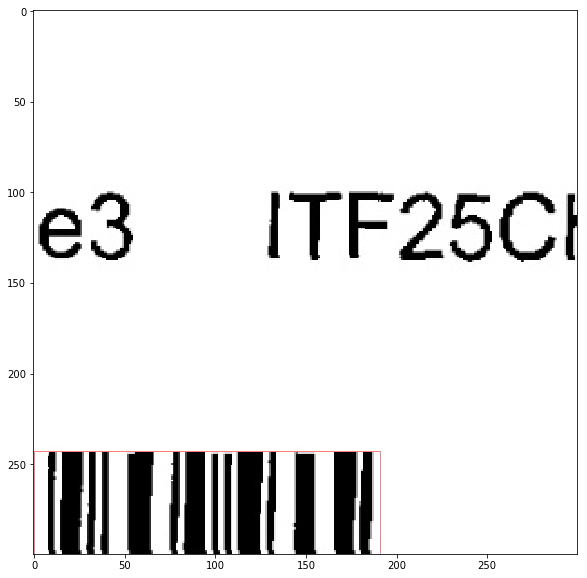

In [54]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(12, 10))

# Display the image
ax.imshow(img)

#r = patches.Rectangle((50,50),100,100,linewidth=2,edgecolor='r',facecolor='none')
#ax.add_patch(r)

for rect in [rects[i]]:
    # Create a Rectangle patch
    rr = rect.copy()
    rr.dump()
    rr.stretch(300, 300)
    rr.dump()
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=0.5,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)
    
for rect in []: #correct:
    # Create a Rectangle patch
    rr = rect.copy()
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=0.5,edgecolor='b',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)
    
for rect in []: #tr:
    # Create a Rectangle patch
    rr = rect.copy()
    rr.stretch(300, 300)
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=0.5,edgecolor='g',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)

plt.show()

i += 1